#### Corners Regression Model Development
##### Pre-Processed Data. 63k matches (football-data).
##### Using Running home team averages and Home League corner averages (commence start of each season at 0) but removing first n matches


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  


In [2]:
df = pd.read_csv('C:\\....\\Python Analysis\\Leagues_Corners_DF_Prepared.csv', index_col=[0])

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HC_Run_Av,HomeT_AC_Run_Av,AwayT_AC_Run_Av,AwayT_HC_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
0,I1,2021-09-11,Napoli,Juventus,2.0,1.0,13.0,1.0,6.23,3.73,2.0,5.0,3.0,8.0,3.0,0.39,0.28,0.33,0.51,0.49,2.71,1.44,1.27,0.17,0.17,5.25,4.78
1,I1,2021-09-11,Atalanta,Fiorentina,1.0,2.0,10.0,3.0,6.39,3.70,5.0,1.0,4.0,3.0,3.0,0.60,0.23,0.17,0.63,0.37,3.20,2.29,0.91,1.38,1.64,5.25,4.78
2,I1,2021-09-12,Sampdoria,Inter,2.0,2.0,4.0,4.0,6.29,3.71,8.0,6.0,4.0,8.0,4.0,0.19,0.23,0.58,0.57,0.43,2.99,0.91,2.08,-1.17,-1.30,5.25,4.78
3,I1,2021-09-12,Cagliari,Genoa,2.0,3.0,2.0,6.0,6.12,3.80,11.0,3.0,2.0,4.0,5.0,0.45,0.28,0.27,0.52,0.48,2.76,1.63,1.13,0.50,0.51,5.25,4.78
4,I1,2021-09-12,Torino,Salernitana,4.0,0.0,7.0,4.0,6.07,3.85,5.0,3.0,4.0,1.0,4.0,0.60,0.24,0.17,0.52,0.48,2.76,1.99,0.80,1.19,1.22,5.25,4.78


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HC', 'AC',
       'HC_Lg_Run_Av', 'AC_Lg_Run_Av', 'HomeT_HC_Run_Av', 'HomeT_AC_Run_Av',
       'AwayT_AC_Run_Av', 'AwayT_HC_Run_Av', 'TG', 'HW_%', 'X_%', 'AW_%',
       'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp',
       'Sup_scld_2.7', 'Proj_HC', 'Proj_AC'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62686 entries, 0 to 62685
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Div              62686 non-null  object 
 1   Date             62686 non-null  object 
 2   HomeTeam         62686 non-null  object 
 3   AwayTeam         62686 non-null  object 
 4   FTHG             62686 non-null  float64
 5   FTAG             62686 non-null  float64
 6   HC               62686 non-null  float64
 7   AC               62686 non-null  float64
 8   HC_Lg_Run_Av     62686 non-null  float64
 9   AC_Lg_Run_Av     62686 non-null  float64
 10  HomeT_HC_Run_Av  62686 non-null  float64
 11  HomeT_AC_Run_Av  62686 non-null  float64
 12  AwayT_AC_Run_Av  62686 non-null  float64
 13  AwayT_HC_Run_Av  62686 non-null  float64
 14  TG               62686 non-null  float64
 15  HW_%             62686 non-null  float64
 16  X_%              62686 non-null  float64
 17  AW_%        

In [6]:
df.describe()

,FTHG,FTAG,HC,AC,HC_Lg_Run_Av,AC_Lg_Run_Av,HomeT_HC_Run_Av,HomeT_AC_Run_Av,AwayT_AC_Run_Av,AwayT_HC_Run_Av,TG,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp,Sup_scld_2.7,Proj_HC,Proj_AC
count,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000,62686.000000
mean,1.485707,1.165380,5.712296,4.647465,5.715264,4.673869,5.712393,4.674206,4.675888,5.714286,2.651086,0.436222,0.264506,0.299241,0.495979,0.504022,2.669549,1.525673,1.143781,0.381892,0.401783,5.739994,4.652161
std,1.258302,1.122706,2.938747,2.631560,0.438854,0.397762,1.460897,1.238531,1.295993,1.397874,1.640511,0.150320,0.040137,0.135733,0.069156,0.069155,0.294809,0.484656,0.411604,0.849431,0.984471,0.403506,0.339935
min,0.000000,0.000000,0.000000,0.000000,3.810000,2.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.050000,0.020000,0.280000,0.140000,1.840000,0.220000,0.180000,-3.850000,-6.700000,4.310000,3.470000
25%,1.000000,0.000000,4.000000,3.000000,5.420000,4.420000,4.810000,3.890000,3.880000,4.830000,1.000000,0.340000,0.260000,0.210000,0.450000,0.470000,2.470000,1.240000,0.890000,-0.050000,-0.050000,5.460000,4.450000
50%,1.000000,1.000000,5.000000,4.000000,5.770000,4.700000,5.640000,4.620000,4.620000,5.640000,2.000000,0.430000,0.280000,0.290000,0.480000,0.520000,2.600000,1.450000,1.090000,0.360000,0.330000,5.800000,4.700000
75%,2.000000,2.000000,7.000000,6.000000,6.020000,4.950000,6.530000,5.380000,5.400000,6.500000,4.000000,0.520000,0.290000,0.370000,0.530000,0.550000,2.790000,1.730000,1.320000,0.820000,0.800000,6.060000,4.900000
max,10.000000,13.000000,24.000000,21.000000,7.420000,6.690000,20.000000,17.000000,17.000000,20.000000,13.000000,0.920000,0.660000,0.900000,0.860000,0.720000,4.850000,4.610000,4.300000,4.360000,7.830000,6.650000,5.240000


In [7]:
df['Div'].unique()

array(['I1', 'E0', 'D1', 'SP1', 'F1', 'SC0', 'N1', 'P1', 'B1', 'E1', 'T1',
       'G1', 'E2', 'E3'], dtype=object)

In [8]:
df.isna().sum()

Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
HC                 0
AC                 0
HC_Lg_Run_Av       0
AC_Lg_Run_Av       0
HomeT_HC_Run_Av    0
HomeT_AC_Run_Av    0
AwayT_AC_Run_Av    0
AwayT_HC_Run_Av    0
TG                 0
HW_%               0
X_%                0
AW_%               0
Ov2.5_%            0
Un2.5_%            0
Exp                0
HG_Exp             0
AG_Exp             0
Sup Exp            0
Sup_scld_2.7       0
Proj_HC            0
Proj_AC            0
dtype: int64

<AxesSubplot:>

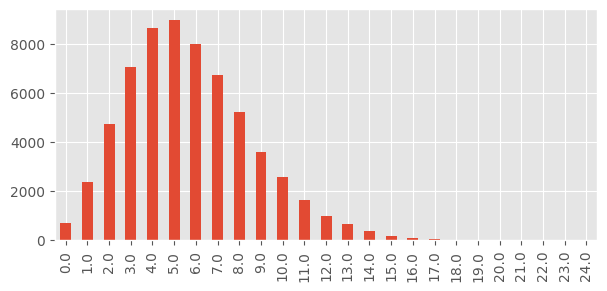

In [9]:
# show distribution of HC
df['HC'].value_counts().sort_index().plot(kind='bar', figsize=(7, 3))

##### Shapiro_Wilk test to show extent of normality

In [10]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['HC'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value},")

# Check if the p-value is less than the significance level (commonly 0.05)
# if less than 5% we reject the null hypothesis that the data follows a normal distribution

if p_value < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9637942314147949
P-value: 0.0,
The data does not follow a normal distribution.


#### Observe best correlated features with home corners

In [11]:
df.corr()['HC'].sort_values()

AW_%              -0.270809
AG_Exp            -0.254435
AC                -0.199175
X_%               -0.116371
Un2.5_%           -0.081020
AwayT_AC_Run_Av   -0.066462
AwayT_HC_Run_Av   -0.064477
FTAG              -0.021117
TG                -0.015435
FTHG              -0.001283
AC_Lg_Run_Av       0.067273
Proj_AC            0.075546
Exp                0.080877
Ov2.5_%            0.081022
Proj_HC            0.100526
HomeT_AC_Run_Av    0.144858
HomeT_HC_Run_Av    0.147546
HC_Lg_Run_Av       0.151581
HG_Exp             0.265147
Sup_scld_2.7       0.266303
Sup Exp            0.274574
HW_%               0.275450
HC                 1.000000
Name: HC, dtype: float64

FTHG              -0.001283
FTAG              -0.021117
HC                 1.000000
AC                -0.199175
HC_Lg_Run_Av       0.151581
AC_Lg_Run_Av       0.067273
HomeT_HC_Run_Av    0.147546
HomeT_AC_Run_Av    0.144858
AwayT_AC_Run_Av   -0.066462
AwayT_HC_Run_Av   -0.064477
TG                -0.015435
HW_%               0.275450
X_%               -0.116371
AW_%              -0.270809
Ov2.5_%            0.081022
Un2.5_%           -0.081020
Exp                0.080877
HG_Exp             0.265147
AG_Exp            -0.254435
Sup Exp            0.274574
Sup_scld_2.7       0.266303
Proj_HC            0.100526
Proj_AC            0.075546
Name: HC, dtype: float64


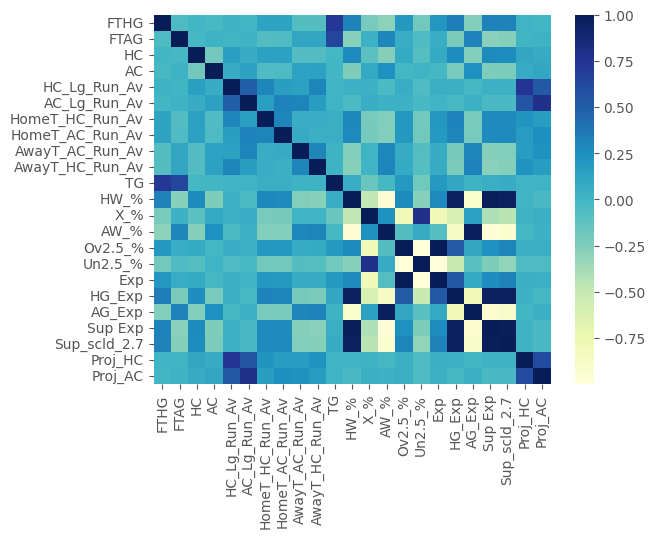

In [12]:
print(df.corr()['HC'])
dataplot=sns.heatmap(df.corr(), cmap='YlGnBu', annot=False)
plt.show()

#### Narrow down the features based on correlation to HC and not being correlated with each other
##### Keep: HG_Exp, AG_Exp, HomeT_HC_Run_Av, AwayT_AC_Run_Av, HC_Lg_Run_Av.
##### Check distributions of the selected features

<AxesSubplot:ylabel='Frequency'>

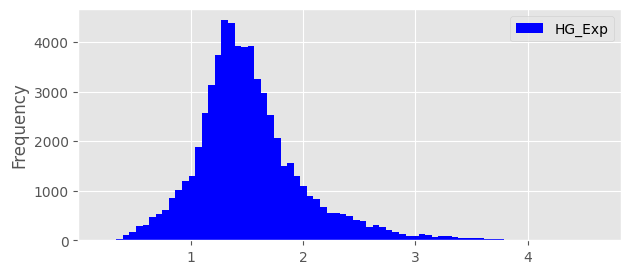

In [13]:
df.plot(kind='hist', y='HG_Exp', bins=75,figsize=(7,3), color = 'blue')

<AxesSubplot:ylabel='Frequency'>

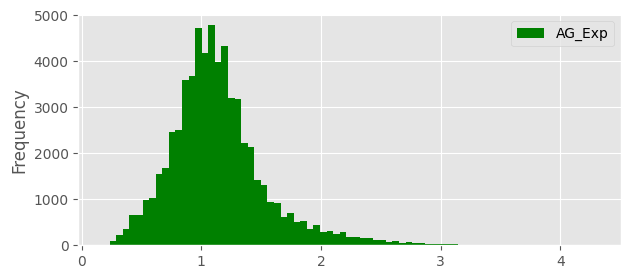

In [14]:
df.plot(kind='hist', y='AG_Exp', bins=75,figsize=(7,3), color='green')

<AxesSubplot:ylabel='Frequency'>

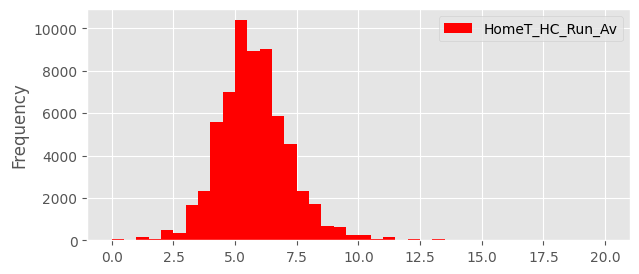

In [15]:
df.plot(kind='hist', y='HomeT_HC_Run_Av', bins=40,figsize=(7,3), color='red')

<AxesSubplot:ylabel='Frequency'>

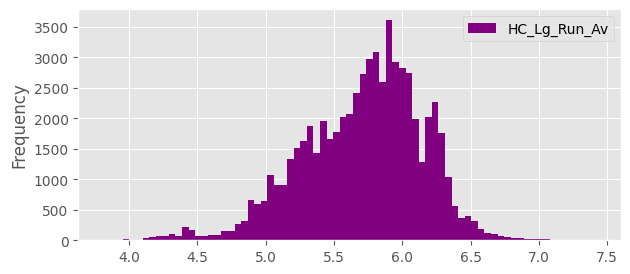

In [16]:
df.plot(kind='hist', y='HC_Lg_Run_Av', bins=75,figsize=(7,3), color='purple')

##### Above chart with slight negative skew - possibly due to using running league average corners despite removing first n matches in pre-processing. Using previous season/s average/s could be better alternative.


#### Plot selected features versus HC to show relationship

<AxesSubplot:xlabel='Sup_scld_2.7', ylabel='HC'>

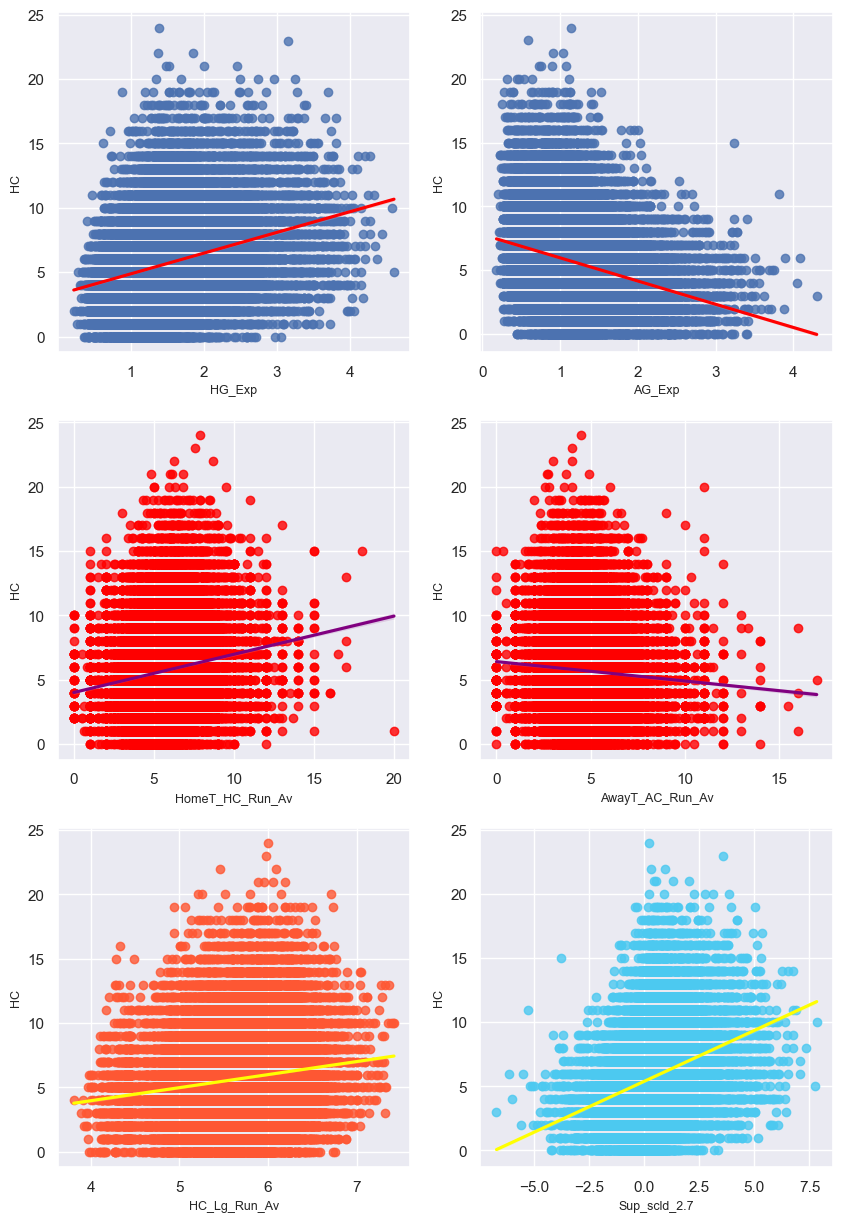

In [17]:
sns.set(rc = {'figure.figsize':(10,15), # width,length
              'axes.labelsize':9})
fig,axes = plt.subplots(3,2)

sns.regplot(data=df, x='HG_Exp', y='HC', ax=axes[0,0], line_kws={'color':'red'})
sns.regplot(data=df, x='AG_Exp', y='HC', ax=axes[0,1], line_kws={'color':'red'})
sns.regplot(data=df, x='HomeT_HC_Run_Av', y='HC', ax=axes[1,0], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='AwayT_AC_Run_Av', y='HC', ax=axes[1,1], scatter_kws={'color': (1, 0, 0)}, line_kws={'color':'purple'})
sns.regplot(data=df, x='HC_Lg_Run_Av', y='HC', ax=axes[2,0], scatter_kws={'color': '#FF5733'}, line_kws={'color':'yellow'})
sns.regplot(data=df, x='Sup_scld_2.7', y='HC', ax=axes[2,1], scatter_kws={'color': '#4CC9F0'}, line_kws={'color':'yellow'})


# _________________________________________________________________________________

#### Model the data, initially Linear Regression 

##### Split data into Train and Test groups and apply linear regression testing different combinations of features
##### Compares R2 and RMSE values as metric to determine best features combination

In [18]:
#Split data separating the independent and target variables
y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=8)
print('number of test samples :', x_test.shape[0])
print('number of training samples :', x_train.shape[0])

number of test samples : 12538
number of training samples : 50148


In [20]:

lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']],y_train)
r2 = lr.score(x_test[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', r2)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)


The R-Square is:  0.09243722162157386
rmse is:  2.783423512911473
0.015713973018159244
[ 0.90698831 -0.86820556  0.0730172  -0.04907877  0.89633407]


In [21]:
# remove lg_Av as a feature

y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av']],y_train)
x = lr.score(x_test[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)


The R-Square is:  0.07445443390134565
rmse is:  2.810864146248291
4.556667598645317
[ 0.88029246 -0.88145023  0.15350394 -0.01106863]


In [22]:
# just HG_Exp and AG_Exp and lg average

y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HC_Lg_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp','AG_Exp','HC_Lg_Run_Av']],y_train)
x = lr.score(x_test[['HG_Exp','AG_Exp','HC_Lg_Run_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)


The R-Square is:  0.09185435375963591
rmse is:  2.7843171743468145
-0.1301619168443997
[ 0.97526357 -0.90821211  0.94449081]


In [23]:
# remove AwayT_AC_Run_Av

y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']],y_train)
x = lr.score(x_test[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.09233851769986312
rmse is:  2.7835748673706986
-0.025455910175832486
[ 0.90469042 -0.92082255  0.06908573  0.87846784]


In [24]:
# Try 'Sup_scld' and 'Exp' as alternative to HG_exp and AG_Exp

y_data = df['HC']
X_data = df[['Sup_scld_2.7', 'Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=8)
#print('number of test samples :', x_test.shape[0])
#print('number of training samples :', x_train.shape[0])

lr = LinearRegression()
lr.fit(x_train[['Sup_scld_2.7', 'Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']],y_train)
r2 = lr.score(x_test[['Sup_scld_2.7', 'Exp', 'HomeT_HC_Run_Av', 'AwayT_AC_Run_Av', 'HC_Lg_Run_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', r2)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.08863193312933892
rmse is:  2.7892526690347026
0.39106259516924524
[ 0.75108795 -0.1237025   0.08060654 -0.05963572  0.90508463]


### Check for linearity of the relationships

In [25]:
# relationship may be non-linear - polynomial transform of HG_Exp vs HST

#from sklearn.preprocessing import PolynomialFeatures

n=3 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,3.5)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HC')
    
    plt.show()
    plt.close()
    
X = df['HG_Exp']
y = df['HC']  

f = np.polyfit(X,y,n) 
p = np.poly1d(f)
print(p)

         3         2
0.08737 x - 1.001 x + 4.268 x + 1.35


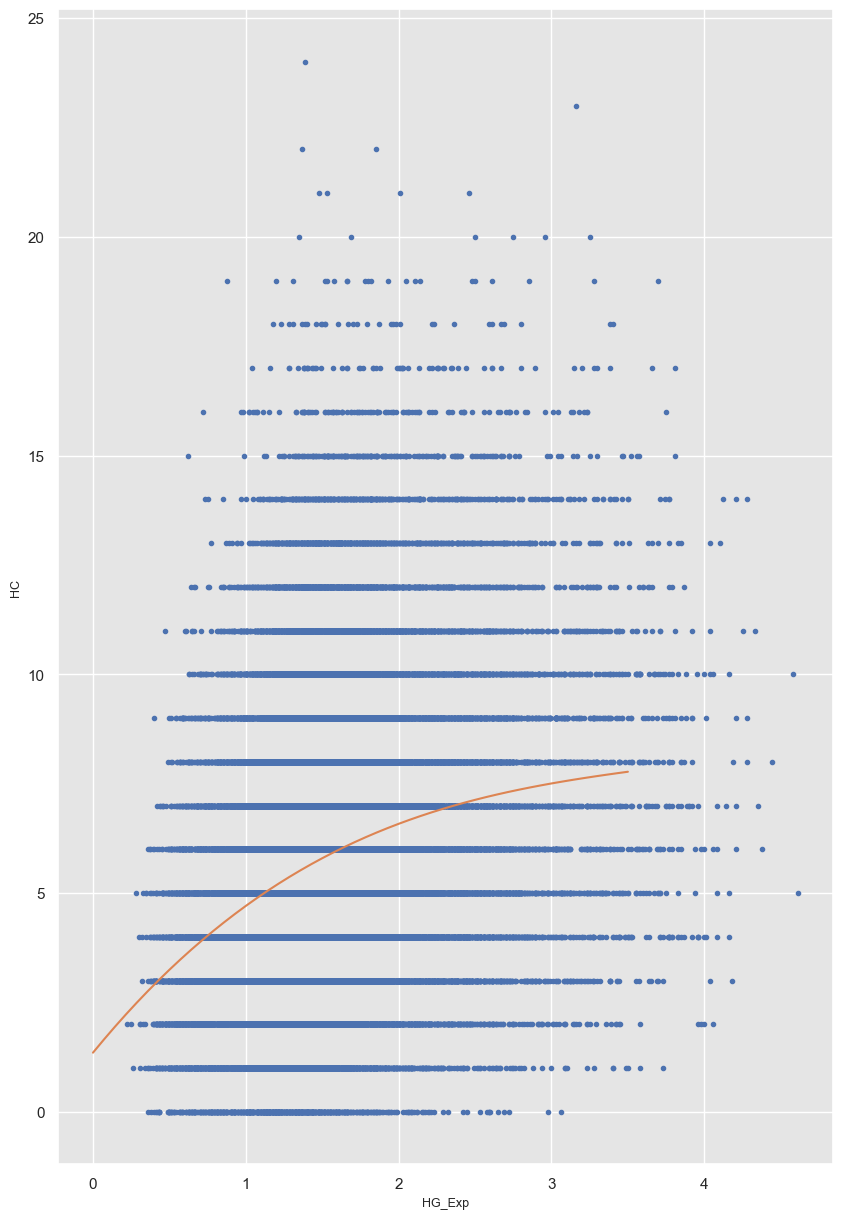

In [26]:
PlotPolly(p,X,y,'HG_Exp')

In [27]:
r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.0756447583112535


#### Use bins to better see relationship

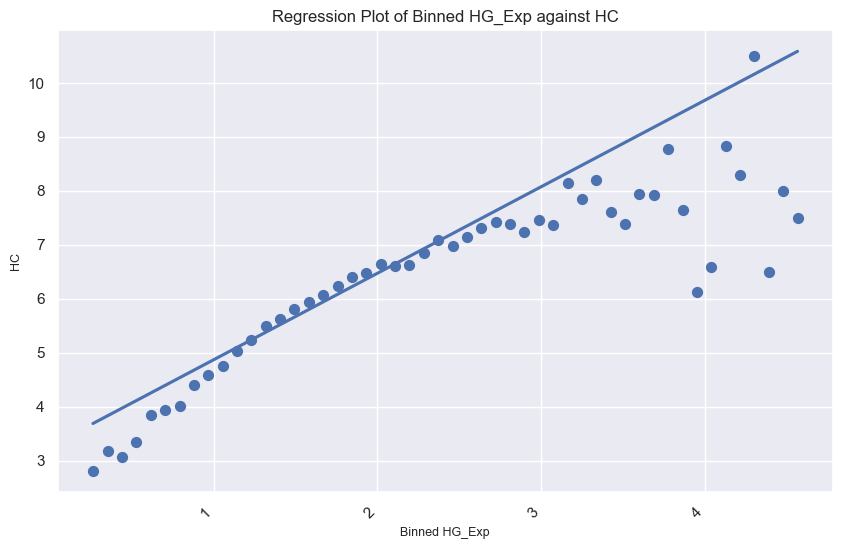

In [28]:
# create new df
data = df[['HG_Exp', 'HC']]

# Specify the number of bins
num_bins = 50

# Create a new column with binned values
df['HG_Exp_bins'] = pd.cut(df['HG_Exp'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HG_Exp_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('Binned HG_Exp')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HG_Exp against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Relationship clearly non linear, especially at high sups

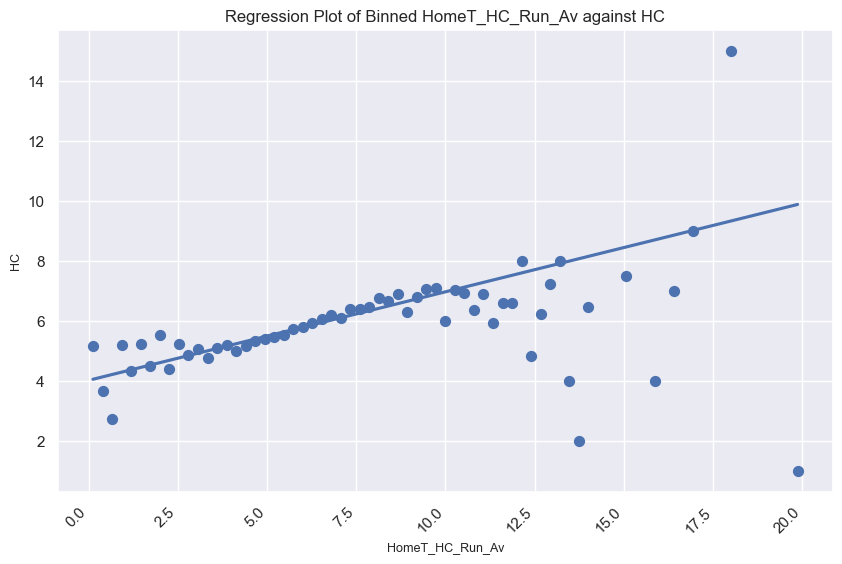

In [29]:
data = df[['HomeT_HC_Run_Av', 'HC']]

# Specify the number of bins
num_bins = 75

# Create a new column with binned values
df['HomeT_HC_Run_Av_bins'] = pd.cut(df['HomeT_HC_Run_Av'], bins=num_bins)

# Calculate the midpoint of each bin
bin_midpoints = df['HomeT_HC_Run_Av_bins'].apply(lambda x: x.mid).astype(float)

# Create a regression plot with binned values
plt.figure(figsize=(10, 6))
sns.regplot(x=bin_midpoints, y='HC', data=df, x_estimator=np.mean, ci=None)

# Add labels and title
plt.xlabel('HomeT_HC_Run_Av')
plt.ylabel('HC')
plt.title('Regression Plot of Binned HomeT_HC_Run_Av against HC')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Again not obviously linear but less stark than HG_Exp although extremes based on early outliers

##### Visualize the curved relationship of binned data

In [30]:
# New df and bin the HG_Exp

# Your dataframe creation code
df_hgx_hc = df[['HC', 'HG_Exp']]

bin_width = 0.05
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_hgx_hc['HG_Exp_Bin'] = pd.cut(df_hgx_hc['HG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'HG_Exp_Bin' is converted to float for later use
df_hgx_hc['HG_Exp_Bin'] = df_hgx_hc['HG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_hgx_hc = df_hgx_hc.groupby('HG_Exp_Bin', as_index=False)['HC'].mean()

         2
-0.4456 x + 3.246 x + 1.846


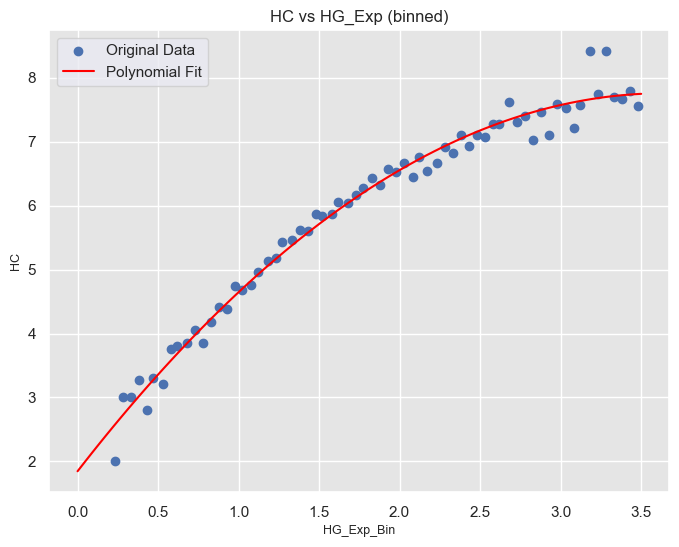

In [31]:

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('HC vs HG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('HC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    

# Example usage
x = group_df_hgx_hc['HG_Exp_Bin']
y = group_df_hgx_hc['HC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'HG_Exp_Bin')


Chart suggest a curved fit likely better. Test Polynomial regression instead of linear 

#### Polynomial Regression

In [32]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline


y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=5)

# Create a pipeline with polynomial features and linear regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
polyreg.fit(x_train[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']], y_train)

# Get the feature names after polynomial transformation
poly_features = polyreg.named_steps['polynomialfeatures'].get_feature_names_out(['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av'])

# Calculate R-squared
r_squared = polyreg.score(x_test[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']], y_test)

# Make predictions using the model
polyreg_y_predict = polyreg.predict(x_test[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, polyreg_y_predict))

# Print the results
print('The R-Square is: ', r_squared)
print('rmse is: ', rmse)
print('Intercept:', polyreg.named_steps['linearregression'].intercept_)
print('Coefficients:', polyreg.named_steps['linearregression'].coef_)

# Print coefficients, corresponding feature names, and interaction terms
for coef, feature_name in zip(polyreg.named_steps['linearregression'].coef_, poly_features):
    if '^2' in feature_name:
        original_feature = feature_name.split('^2')[0]
        print(f'Interaction Term: {original_feature}')
        print(f'Interaction Term^2: {feature_name}')
        print(f'Coeff {feature_name}: {round(coef, 3)}')
    else:
        print(f'Coeff {feature_name}: {round(coef, 3)}')


The R-Square is:  0.1009085074540308
rmse is:  2.807826253987828
Intercept: -3.3484542805204285
Coefficients: [ 0.00000000e+00  3.47020130e+00  1.07841947e+00 -1.56988768e-01
  1.17284515e+00 -4.59976064e-01 -4.30379258e-01  4.79249716e-02
 -1.41124205e-01  1.04903288e-01  3.13718442e-02 -3.18923045e-01
 -2.16514156e-03  2.30694485e-02  1.33208882e-02]
Coeff 1: 0.0
Coeff HG_Exp: 3.47
Coeff AG_Exp: 1.078
Coeff HomeT_HC_Run_Av: -0.157
Coeff HC_Lg_Run_Av: 1.173
Interaction Term: HG_Exp
Interaction Term^2: HG_Exp^2
Coeff HG_Exp^2: -0.46
Coeff HG_Exp AG_Exp: -0.43
Coeff HG_Exp HomeT_HC_Run_Av: 0.048
Coeff HG_Exp HC_Lg_Run_Av: -0.141
Interaction Term: AG_Exp
Interaction Term^2: AG_Exp^2
Coeff AG_Exp^2: 0.105
Coeff AG_Exp HomeT_HC_Run_Av: 0.031
Coeff AG_Exp HC_Lg_Run_Av: -0.319
Interaction Term: HomeT_HC_Run_Av
Interaction Term^2: HomeT_HC_Run_Av^2
Coeff HomeT_HC_Run_Av^2: -0.002
Coeff HomeT_HC_Run_Av HC_Lg_Run_Av: 0.023
Interaction Term: HC_Lg_Run_Av
Interaction Term^2: HC_Lg_Run_Av^2
Coeff 

##### Conclusion:
- Polynomial regression model has R sq of 0.1 using 2 degree fit (better than linear). 
- Although still fairly low it likely suggests corners are more random in occurrence (SOT has an R2 of approx 0.2)
- Next step - use previous season averages for HG_Lg_Av rather than running average. Charts suggest data is skewed negatively 


##### Final fit for HC using all the data

In [33]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline

y_data = df['HC']
X_data = df[['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av']]

# Split the data into training and testing sets 
# x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

# Create a pipeline with polynomial features and linear regression
degree = 2  # You can adjust the degree based on the complexity of the relationship
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
polyreg.fit(X_data, y_data)

# Calculate R-squared
r_squared = polyreg.score(X_data, y_data)

# Make predictions using the model
polyreg_y_predict = polyreg.predict(X_data)

# Get the feature names after polynomial transformation
poly_features = polyreg.named_steps['polynomialfeatures'].get_feature_names_out(['HG_Exp', 'AG_Exp', 'HomeT_HC_Run_Av', 'HC_Lg_Run_Av'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_data, polyreg_y_predict))

# Get the intercept and coefficients
intercept_ = polyreg.named_steps['linearregression'].intercept_
coefficients = polyreg.named_steps['linearregression'].coef_

# Print the results
print('The R-Square is:', r_squared)
print('RMSE is:', rmse)
print('Intercept:', intercept_)
print('Coefficients:', coefficients)

# Print coefficients, corresponding feature names, and interaction terms
for coef, feature_name in zip(polyreg.named_steps['linearregression'].coef_, poly_features):
    if '^2' in feature_name:
        original_feature = feature_name.split('^2')[0]
        print(f'Interaction Term: {original_feature}')
        print(f'Interaction Term^2: {feature_name}')
        print(f'Coeff {feature_name}: {round(coef, 3)}')
    else:
        print(f'Coeff {feature_name}: {round(coef, 3)}')

The R-Square is: 0.09780695976470244
RMSE is: 2.791312408328472
Intercept: -2.035687757775909
Coefficients: [ 0.00000000e+00  2.93278702e+00  6.51097402e-01 -1.13817731e-01
  8.82736630e-01 -3.89705844e-01 -3.44347295e-01  2.68034035e-02
 -8.14919968e-02  9.57141776e-02 -3.43281112e-03 -2.25614452e-01
 -3.21862888e-04  2.49622945e-02  2.12021214e-02]
Coeff 1: 0.0
Coeff HG_Exp: 2.933
Coeff AG_Exp: 0.651
Coeff HomeT_HC_Run_Av: -0.114
Coeff HC_Lg_Run_Av: 0.883
Interaction Term: HG_Exp
Interaction Term^2: HG_Exp^2
Coeff HG_Exp^2: -0.39
Coeff HG_Exp AG_Exp: -0.344
Coeff HG_Exp HomeT_HC_Run_Av: 0.027
Coeff HG_Exp HC_Lg_Run_Av: -0.081
Interaction Term: AG_Exp
Interaction Term^2: AG_Exp^2
Coeff AG_Exp^2: 0.096
Coeff AG_Exp HomeT_HC_Run_Av: -0.003
Coeff AG_Exp HC_Lg_Run_Av: -0.226
Interaction Term: HomeT_HC_Run_Av
Interaction Term^2: HomeT_HC_Run_Av^2
Coeff HomeT_HC_Run_Av^2: -0.0
Coeff HomeT_HC_Run_Av HC_Lg_Run_Av: 0.025
Interaction Term: HC_Lg_Run_Av
Interaction Term^2: HC_Lg_Run_Av^2
Coeff H

In [34]:
# Prediction 

HG = 3.5
AG = 0.4
H_Av = 5
Lg_Av = 5

x_new = pd.DataFrame({'HG_Exp': [HG], 'AG_Exp': [AG], 'HomeT_HC_Run_Av': [H_Av], 'HC_Lg_Run_Av': [Lg_Av]})

# Use the trained model to make predictions on the new data
predictions = polyreg.predict(x_new)

print("Predicted HC value:", predictions[0])

Predicted HC value: 6.824350660998489


# ______________________________________________________________________________

#### Repeat for AC using same features

In [35]:
df.corr()['AC'].sort_values()

HW_%              -0.245982
Sup Exp           -0.245511
Sup_scld_2.7      -0.236851
HG_Exp            -0.221378
HC                -0.199175
HomeT_HC_Run_Av   -0.057079
HomeT_AC_Run_Av   -0.054502
FTHG              -0.028257
Exp               -0.020348
Ov2.5_%           -0.015377
TG                -0.006513
Un2.5_%            0.015378
FTAG               0.022153
HC_Lg_Run_Av       0.065661
Proj_HC            0.076389
X_%                0.086150
Proj_AC            0.102786
AwayT_AC_Run_Av    0.137804
AwayT_HC_Run_Av    0.142600
AC_Lg_Run_Av       0.145522
AG_Exp             0.245996
AW_%               0.246795
AC                 1.000000
Name: AC, dtype: float64

<AxesSubplot:>

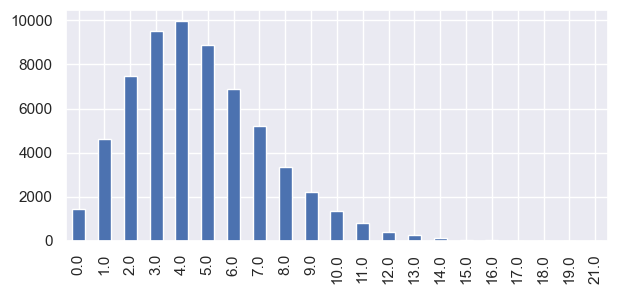

In [36]:
# show distribution of HC
df['AC'].value_counts().sort_index().plot(kind='bar', figsize=(7, 3))

##### Visualize relationship between AC and AG_Exp using binned data

In [49]:
# New df and bin the HG_Exp

# Your dataframe creation code
df_agx_ac = df[['AC', 'AG_Exp']]

bin_width = 0.07
min_value = 0
max_value = 3.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_agx_ac['AG_Exp_Bin'] = pd.cut(df_agx_ac['AG_Exp'], bins=bins, labels=labels, right=False, ordered=False)

# Ensure that 'AG_Exp_Bin' is converted to float 
df_agx_ac['AG_Exp_Bin'] = df_agx_ac['AG_Exp_Bin'].astype('float')

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

# Use groupby without resetting the index to avoid potential issues
group_df_agx_ac = df_agx_ac.groupby('AG_Exp_Bin', as_index=False)['AC'].mean()

         2
-0.2928 x + 2.454 x + 2.147


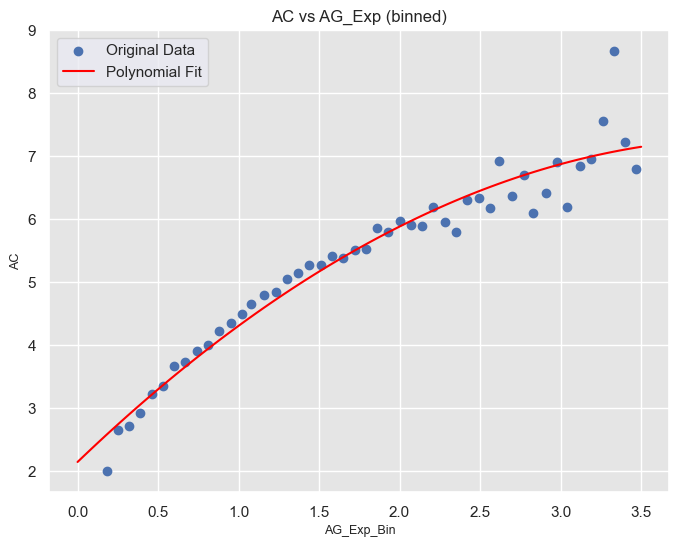

In [51]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0, 3.5, 80)
    y_new = model(x_new)

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Scatter plot of the original data points
    plt.scatter(ind_var, dep_var, label='Original Data')

    # Plot the polynomial trendline
    plt.plot(x_new, y_new, label='Polynomial Fit', color='red')

    plt.title('AC vs AG_Exp (binned)')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('AC')
    plt.legend()  # Show legend with labels

    plt.show()
    plt.close()
    

# Example usage
x = group_df_agx_ac['AG_Exp_Bin']
y = group_df_agx_ac['AC']

# declare poly degree
degree = 2

f = np.polyfit(x, y, degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function
PlotPolly(p, x, y, 'AG_Exp_Bin')

##### Train AC Polynomial

In [39]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline


y_data = df['AC']
X_data = df[['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=10)

# Create a pipeline with polynomial features and linear regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
polyreg.fit(x_train[['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']], y_train)

# Get the feature names after polynomial transformation
poly_features = polyreg.named_steps['polynomialfeatures'].get_feature_names_out(['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av'])

# Calculate R-squared
r_squared = polyreg.score(x_test[['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']], y_test)

# Make predictions using the model
polyreg_y_predict = polyreg.predict(x_test[['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, polyreg_y_predict))

# Print the results
print('The R-Square is: ', r_squared)
print('rmse is: ', rmse)
print('Intercept:', polyreg.named_steps['linearregression'].intercept_)
print('Coefficients:', polyreg.named_steps['linearregression'].coef_)

# Print coefficients, corresponding feature names, and interaction terms
for coef, feature_name in zip(polyreg.named_steps['linearregression'].coef_, poly_features):
    if '^2' in feature_name:
        original_feature = feature_name.split('^2')[0]
        print(f'Interaction Term: {original_feature}')
        print(f'Interaction Term^2: {feature_name}')
        print(f'Coeff {feature_name}: {round(coef, 3)}')
    else:
        print(f'Coeff {feature_name}: {round(coef, 3)}')


The R-Square is:  0.08095074574554584
rmse is:  2.5317970823309404
Intercept: 2.5434879739406147
Coefficients: [ 0.         -0.51765411 -0.83399588  0.00156307  0.13910278  0.11946111
  0.18790085 -0.01689082 -0.06661342 -0.07307474 -0.05644112  0.49923418
 -0.00368078  0.03890281  0.00722536]
Coeff 1: 0.0
Coeff HG_Exp: -0.518
Coeff AG_Exp: -0.834
Coeff AwayT_AC_Run_Av: 0.002
Coeff AC_Lg_Run_Av: 0.139
Interaction Term: HG_Exp
Interaction Term^2: HG_Exp^2
Coeff HG_Exp^2: 0.119
Coeff HG_Exp AG_Exp: 0.188
Coeff HG_Exp AwayT_AC_Run_Av: -0.017
Coeff HG_Exp AC_Lg_Run_Av: -0.067
Interaction Term: AG_Exp
Interaction Term^2: AG_Exp^2
Coeff AG_Exp^2: -0.073
Coeff AG_Exp AwayT_AC_Run_Av: -0.056
Coeff AG_Exp AC_Lg_Run_Av: 0.499
Interaction Term: AwayT_AC_Run_Av
Interaction Term^2: AwayT_AC_Run_Av^2
Coeff AwayT_AC_Run_Av^2: -0.004
Coeff AwayT_AC_Run_Av AC_Lg_Run_Av: 0.039
Interaction Term: AC_Lg_Run_Av
Interaction Term^2: AC_Lg_Run_Av^2
Coeff AC_Lg_Run_Av^2: 0.007


#### Using all the data

In [40]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline

y_data = df['AC']
X_data = df[['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av']]

#x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=5)

# Create a pipeline with polynomial features and linear regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
polyreg.fit(X_data, y_data)

# Get the feature names after polynomial transformation
poly_features = polyreg.named_steps['polynomialfeatures'].get_feature_names_out(['HG_Exp', 'AG_Exp', 'AwayT_AC_Run_Av', 'AC_Lg_Run_Av'])

# Calculate R-squared
r_squared = polyreg.score(X_data, y_data)

# Make predictions using the model
polyreg_y_predict = polyreg.predict(X_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_data, polyreg_y_predict))

# Print the results
print('The R-Square is: ', r_squared)
print('rmse is: ', rmse)
print('Intercept:', polyreg.named_steps['linearregression'].intercept_)
print('Coefficients:', polyreg.named_steps['linearregression'].coef_)

# Print coefficients, corresponding feature names, and interaction terms
for coef, feature_name in zip(polyreg.named_steps['linearregression'].coef_, poly_features):
    if '^2' in feature_name:
        original_feature = feature_name.split('^2')[0]
        print(f'Interaction Term: {original_feature}')
        print(f'Interaction Term^2: {feature_name}')
        print(f'Coeff {feature_name}: {round(coef, 3)}')
    else:
        print(f'Coeff {feature_name}: {round(coef, 3)}')

The R-Square is:  0.08341158258661163
rmse is:  2.5193990565418005
Intercept: 2.23387480793194
Coefficients: [ 0.         -0.28645244 -0.28245061  0.01042089  0.06516293  0.07301817
  0.01664896 -0.01823299 -0.04565535 -0.17993041 -0.05779304  0.48843029
 -0.00257844  0.03603104  0.0135177 ]
Coeff 1: 0.0
Coeff HG_Exp: -0.286
Coeff AG_Exp: -0.282
Coeff AwayT_AC_Run_Av: 0.01
Coeff AC_Lg_Run_Av: 0.065
Interaction Term: HG_Exp
Interaction Term^2: HG_Exp^2
Coeff HG_Exp^2: 0.073
Coeff HG_Exp AG_Exp: 0.017
Coeff HG_Exp AwayT_AC_Run_Av: -0.018
Coeff HG_Exp AC_Lg_Run_Av: -0.046
Interaction Term: AG_Exp
Interaction Term^2: AG_Exp^2
Coeff AG_Exp^2: -0.18
Coeff AG_Exp AwayT_AC_Run_Av: -0.058
Coeff AG_Exp AC_Lg_Run_Av: 0.488
Interaction Term: AwayT_AC_Run_Av
Interaction Term^2: AwayT_AC_Run_Av^2
Coeff AwayT_AC_Run_Av^2: -0.003
Coeff AwayT_AC_Run_Av AC_Lg_Run_Av: 0.036
Interaction Term: AC_Lg_Run_Av
Interaction Term^2: AC_Lg_Run_Av^2
Coeff AC_Lg_Run_Av^2: 0.014


In [41]:
# Prediction 

HG = 3
AG = 0.5
A_Av = 4
A_Lg_Av = 3.5

x_new = pd.DataFrame({'HG_Exp': [HG], 'AG_Exp': [AG], 'AwayT_AC_Run_Av': [A_Av], 'AC_Lg_Run_Av': [A_Lg_Av]})

# Use the trained model to make predictions on the new data
predictions = polyreg.predict(x_new)

print("Predicted AC value:", predictions[0])

Predicted AC value: 2.809961502199924
